In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

# JTC (JAPAN TOURING CAR) 1985-1993
## O Objetivo é um realizar um projeto ETL, mineração de dados com BeautifulSoup, de análise de dados (Pandas,NumPy) e visualização de dados (matplotlib,seaborn). 

## Etapa 1 : Minerar dados através do site <a href=http://touringcarracing.net/>Touring Car Racing</a> e juntar os dados de todas as tabelas de todas as corridas, desde o início da categoria em 1985 até a extinção dela em 1993, em uma única grande tabela em .csv (de preferência). 

## Etapa 2: Com a Extração concluída, os dados RAW estão preparados para análise de dados, realizar drops em algumas colunas, criar colunas com informações já coletadas através do HTML com o Beautiful Soup (Ex: coletar a info do ano e Circuito no HTML e criar uma coluna para uma dessas infos), mudar os index da tabela, separar colunas com muitas informações (fazer split em colunas como Piloto/Nacionalidade), tratar NULL,NaN, substituir valores, tratar tipos de dados (datatime principalmente), preparar os dados numéricos de tal forma a realizar operações matemáticas/estatísticas com os mesmos.

## Etapa 3: Com a etapa de Transformação de dados concluída e o Loading de dados feito no arquivo .csv gerado, realizar a Visualização de Dados através do Matplotlib/Seaborn. Responder algumas perguntas: Qual montadora conquistou mais pódios? Será que quem faz Poli position sempre ganha? Cacular o porcentual Vitórias por Pole. Quantas vezes o lendário Team Impul não terminou uma corrida (DNF- Did Not Finish) ? Qual porcentual de carros com  motores que não são 4 cilindros (L4), entre 1985 a 1989? Qual a volta mais rápida, na qualificação, em todo tempo que a categoria existiu, em Suzuka e qual foi o piloto e modelo do carro?

### And so on...
### Objetivos secundários incluem algumas análises estatísticas, integração com BDs, análise em outras ferramentas de análise, etc.
### Realizar análise em outras categorias, ETCC, WTCC, WTRC, DTM

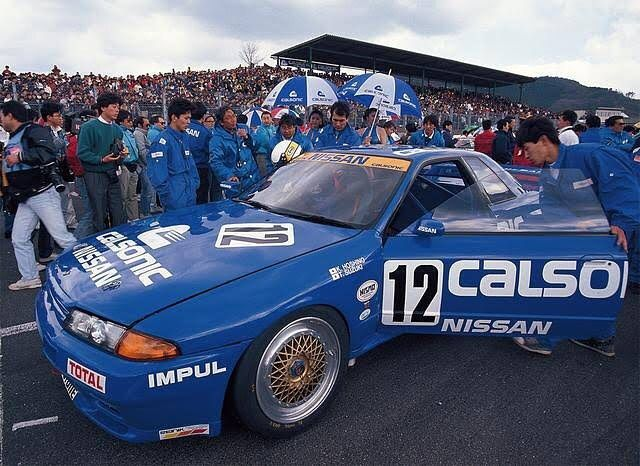

## Objetivo: ETAPA 1

In [3]:
import time

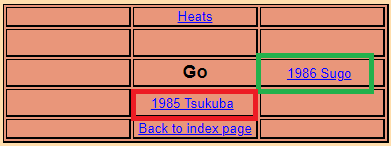

In [9]:
# O Projeto se baseia neste navegador que está em todas páginas. 
# A lógica abaixo é a seguinte: 

# o retângulo vermelho contém o link da próxima página(no mesmo ano/temporada). Extrai-se os dados de todas as páginas.
# Na última página, não haverá mais link onde está o retângulo vermelho.Então, o link a ser guardado na variavel é o
# retângulo verde(próximo ano/temporada)
# Seguir até quando não haver mais links nos retângulos vermelho(temporada atual) e verde (próxima temporada).

# Depois de testar partes do código, como por exemplo, extração de infos, drop em linhas e colunas, manipulação da
# tabela extraída para dataframe, etc. Tentei executar o navegador. Extraindo tabela a tabela, o que resultaria em
# 50 tabelas em .CSV. A concatenação entre tabelas CSV. também foi testada e funciona o código.

# Porém o navegador do site não funciona da forma como eu esperava. A lógica seria acabar todos os links do retângulo
# vermelho (fim da temporada/ano) e quando ir para o retângulo verde, começar o próximo ano/temporada desde o primeiro.
# E isso NÃO acontece...o navegador do site inicia a próxima temporada/ano com o MESMO NOME da pista anterior
# e esta pista pode estar em qualquer ordem no próximo ano/temp.Isso inviabilizou completamente a extração de dados...

In [6]:
#Usando o BeautifulSoup pra extrair o HTML da página web

#corrigindo BUGS, muitos BUGS!! Mas evoluindo aos poucos

headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
page= requests.get('http://touringcarracing.net/Races/1985%20Sugo.html', headers = headers)
#print(page.content)
soup_L3 = BeautifulSoup(page.content,'html.parser')
site = 'http://touringcarracing.net/Races/'
season = '1985%20Sugo.html'
link_L3 = site+season
#df_JTC_ = pd.DataFrame()

end=''
i=0
soup_line3 = ''
soup_line2 = ''
soup_line3 = soup_L3.find('table', bordercolor="#000000").find_all('tr')[3].find_all('td')[1].text
soup_line2 = soup_L3.find('table', bordercolor="#000000").find_all('tr')[2].find_all('td')[2].text


#ETAPA 2 - JUNTAR TODOS CODIGOS DAS CELULAS NESTA UNICA CELULA E TESTAR O ALGORITMO PARA GERAR AS 50 PLANILHAS .CSV


while(end != 'CSV OK'):
    
    if soup_line3 == '\xa0':    
        if soup_line2 == '\xa0':
            print(" CSVs gerados com sucesso")  #Fim da análise, todos CSVs gerados
            end = 'CSV OK'
        else:
            #montar o link para a nova página a ser analisada (linha 4 ==  elemento 3 da lista de de <tr>)
            link_L3 = (site+soup_L3.find('table', bordercolor="#000000").find_all('tr')[3].find_all('td')[1].text
                      .replace(' ', '%20').strip()+'.html')
            print(link_L3)
            page = requests.get(link_L3, headers = headers)
            soup_L3 = BeautifulSoup(page.content,'html.parser')
            print(soup_L3)
            soup_line3 = soup_L3.find('table', bordercolor="#000000").find_all('tr')[3].find_all('td')[1].text
            #pegar nome do circuito
            attrs_circuit={'class','circuit'}
            circuit = soup_L3.find('div',attrs_circuit).text
            #pegar data da corrida
            attrs_date={'class','element'}
            date = soup_L3.find('span',attrs=attrs_date).next_sibling.strip()
            #transformar a tabela em string e depois em dataframe
            attrs_table = {'cellspacing' : '0'}
            table= soup_L3.find("table",attrs=attrs_table)
            table_str = str(table)
            df0 = pd.read_html(table_str)
            #pd.read_html gera uma LISTA de DATAFRAMES. A variável df_JTC recebe o PRIMEIRO elemento da lista df0
            df_JTC = df0[0]
            #Ajustes: drop em linhas e colunas que não são interessantes na análise, definir uma das linhas como coluna
            #Ajustes: resetar o index, iniciando do zero, sem gerar uma coluna chamada INDEX. 
            conteudo = df_JTC.drop(0).drop(columns=[11])
            headerJTC = conteudo.loc[1, 0:]
            columns_JTC = [headerJTC.values]
            df_JTC = pd.DataFrame(data=conteudo.values, columns=columns_JTC).drop(0).reset_index(drop=True)
            #Salvar o Dataframe preparado em uma tabela CSV
            df_JTC.to_csv("JTC_"+str(i)+".csv")
            time.sleep(1)
            i += 1      
            print(i)
    else:
        if soup_line3 == '\xa0':
            #soup_line3 = soup_L3.find('table', bordercolor="#000000").find_all('tr')[3].find_all('td')[1].text
             #montar o link para a nova página a ser analisada, se soup_line3 == '\xa0'
            # (linha 3 ==  elemento 2 da lista de de <tr>)
            link_L2 = (site+soup_L2.find('table', bordercolor="#000000").find_all('tr')[2].find_all('td')[2].text
                       .replace(' ', '%20').strip()+'.html')
            page = requests.get(link_L2, headers = headers)
            soup_L2 = BeautifulSoup(page.content,'html.parser')
            soup_line2 = soup_L2.find('table', bordercolor="#000000").find_all('tr')[2].find_all('td')[2].text
            time.sleep(1)
            #forçando a flag para soup_line3 == '\xa0', senão dá erro, vazio.
            soup_line3 == '\xa0'
            print(i)
        else:
            #montar o link para a nova página a ser analisada (linha 4 ==  elemento 3 da lista de de <tr>)
            link_L3 = (site+soup_L3.find('table', bordercolor="#000000").find_all('tr')[3].find_all('td')[1].text
                       .replace(' ', '%20').strip()+'.html')
            #replace("link_L3", ' ', '%20')
            
            page = requests.get(link_L3, headers = headers)
            soup_L3 = BeautifulSoup(page.content,'html.parser')
            
            #print(soup_L3)
            
            print(link_L3)
            
            soup_line3 = soup_L3.find('table', bordercolor="#000000").find_all('tr')[3].find_all('td')[1].text
            #pegar nome do circuito
            attrs_circuit={'class','circuit'}
            circuit = soup_L3.find('div',attrs_circuit).text
            #pegar data da corrida
            attrs_date={'class','element'}
            date = soup_L3.find('span',attrs=attrs_date).next_sibling.strip()
            #transformar a tabela em string e depois em dataframe
            attrs_table = {'cellspacing' : '0'}
            table= soup_L3.find("table",attrs=attrs_table)
            table_str = str(table)
            df0 = pd.read_html(table_str)
            #pd.read_html gera uma LISTA de DATAFRAMES. A variável df_JTC recebe o PRIMEIRO elemento da lista df0
            df_JTC = df0[0]
            #Ajustes: drop em linhas e colunas que não são interessantes na análise, definir uma das linhas como coluna
            #Ajustes: resetar o index, iniciando do zero, sem gerar uma coluna chamada INDEX. 
            conteudo = df_JTC.drop(0).drop(columns=[11])
            headerJTC = conteudo.loc[1, 0:]
            columns_JTC = [headerJTC.values]
            df_JTC = pd.DataFrame(data=conteudo.values, columns=columns_JTC).drop(0).reset_index(drop=True)
            #Salvar o Dataframe preparado em uma tabela CSV
            df_JTC.to_csv("JTC_"+str(i)+".csv") 
            time.sleep(1)
            i += 1
            print(i)


http://touringcarracing.net/Races/1985%20Tsukuba.html
1
http://touringcarracing.net/Races/1985%20Nishi%20Nippon.html
2
http://touringcarracing.net/Races/1985%20Suzuka.html
3
http://touringcarracing.net/Races/1985%20Fuji.html
4
http://touringcarracing.net/Races/.html
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>ERROR 403 - Forbidden!</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="noindex" name="robots"/>
<style type="text/css">
	
	h1 img {width: 140px; float:left;margin-top:-15px}
	li {line-height: 20px; width: 70%}
	li {margin-bottom: 14px}
	
	<!--
    body {
        color: #444444;
        background-color: #EEEEEE;
        font-family: 'Trebuchet MS', sans-serif;
        font-size: 80%;
    }
    h1 {}
    h2 { font-size: 1.2em; }
    #page{
        background-color: #FFFFFF;
   

AttributeError: 'NoneType' object has no attribute 'find_all'

# TESTES DE PARTES DO CÓDIGO DE EXTRAÇÃO

#### Como forma de me desafiar, resolvi automatizar toda extração, utilizando o BeautifulSoup, uma biblioteca que nunca tive contato anteriormente. 
#### Dividi o projeto em 3 Etapas, e tive como objetivo entregar a ETAPA 1. O desconhecimento da biblioteca, o HTML do site escolhido não ser bom e algumas dificuldades com o Python tornaram a finalização dessa etapa desafiadora. Apesar da não conclusão da ETAPA 1, deixo registrado aqui evidências de que boa parte do código funciona. 

#### Creio que faltaram a construção de funções para diminuir consideravelmente o código e outros ajustes


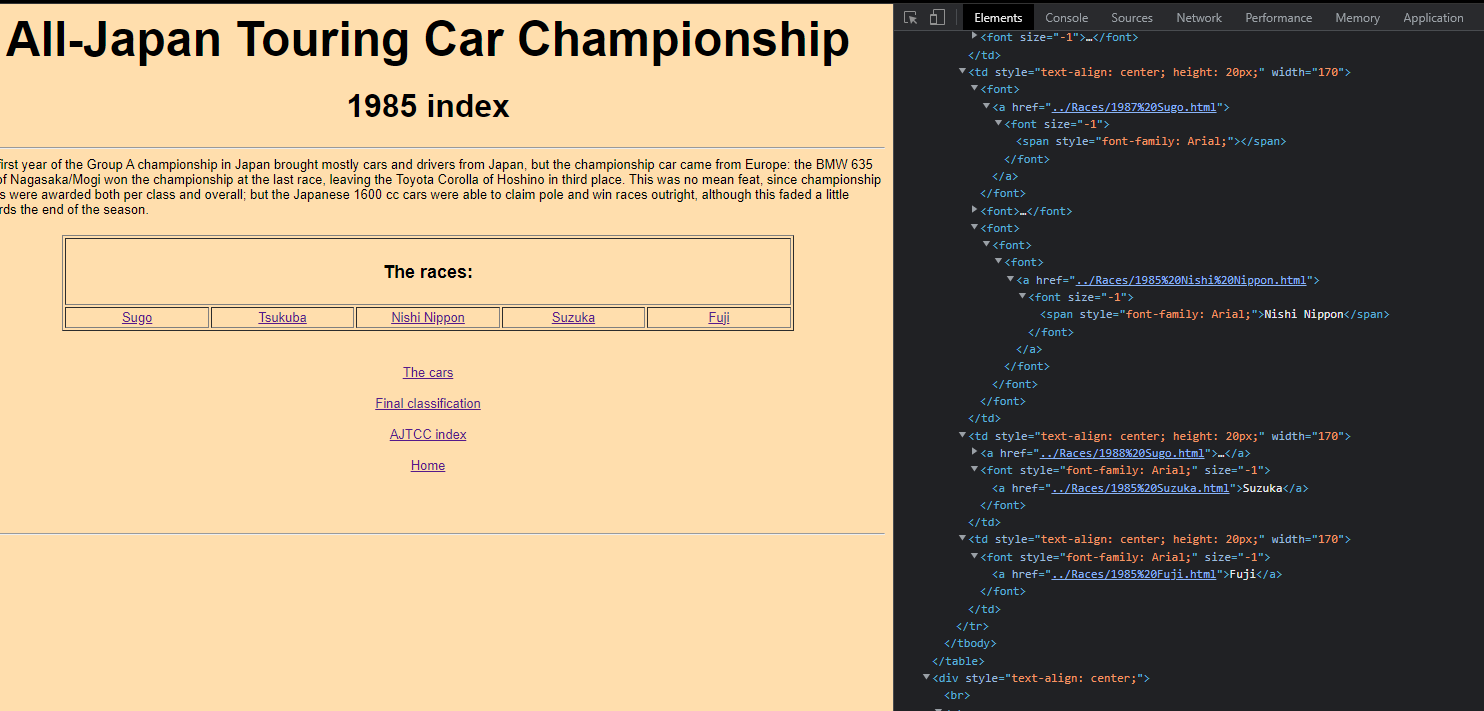

### Uma alternativa seria acessar os links de cada ano/temp. através da tabela index mas o HTML está confuso. Observa-se na mesma TAG < td > duas TAGs < a > . O nome das pistas ora aparece dentro de uma < span > , ora aparece na TAG < a > . Uma alternativa seria iterar sobre as TAGs SPAN e A e ignorar o que for vazio ou nbsp. Mas isso é garantido nesta página, nas outras 49 páginas há variações. HTML confuso. Posteriormente irei fazer 'na mão' o copiar e colar dos links em variáveis para concluir o projeto.

In [ ]:
#Abaixo testes de partes do código

In [220]:
table1= soup.find_all("a",href="1985%20Tsukuba.html") 

In [221]:
table1

[<a href="1985%20Tsukuba.html">1985 Tsukuba</a>]

In [134]:
import os
import csv
import glob
os.chdir("C:\Projetos")

In [5]:
# Extraindo essa informação para posteriormente criar uma coluna na tabela

attrs_circuit={'class','circuit'}
circuit = soup.find('div',attrs_circuit).text
print(circuit)

Sportsland Sugo, near Sendai, Japan


In [6]:
# Extraindo essa informação para posteriormente criar uma coluna na tabela

attrs_date={'class','element'}

# A data estava FORA do span, houve necessidade de usar 'next_sibling' para extrair a informação e o 'strip()'
# para retirar espaços antes e após a data
date = soup.find('span',attrs=attrs_date).next_sibling.strip()
print(date)

2/6/1985


In [ ]:
# Extraindo a tabela e a transformando em uma lista de dataframes pois é a saída padrão do método pd.read_html()

attrs_table = {'cellspacing' : '0'}
table= soup.find("table",attrs=attrs_table)
table_str = str(table)
df0 = pd.read_html(table_str)
display(df0)

In [ ]:
#verificando o tipo
print( type(df0) )

In [ ]:
#Verificando como está formatado o Dataframe, sem index e colunas definidos
df0[0].head(10)

In [138]:
# Como df é uma lista de elementos do tipo dataframe, joguei a posição 0 da lista, ou seja
# o dataframe da tabela extraída do site para uma variável que vai conter o Dataframe.

df_JTC_0 = df0[0]

In [ ]:
# Dataframe 'Conteudo' foi criado pra receber o conteudo sem a coluna 11 e linha 0. 
# headerJTC recebe uma parte do Dataframe Conteudo, no caso, a linha 1 inteira->valores+o nome da linha
# columns_JTC recebe apenas o valores da linha 1, portanto, não recebendo o nome da linha que neste caso não é interessante
# df_JTC_0 agora será um novo dataframe que recebe os valores do Dataframe Conteudo + Colunas definidas por columns_JTC
# ou seja, a linha 1 passa a ser as colunas do Dataframe df_JTC_0.
# drop(0) apaga a linha que agora é a coluna do Dataframe df_JTC_0 
# reset_index(drop=True), reseta o índice de linhas. Por padrão esse metódo gera uma nova coluna chamada INDEX,
# No caso essa coluna não é útil então para ela não aperecer usou-se 'drop=True'

conteudo = df_JTC_0.drop(0).drop(columns=[11])
headerJTC = conteudo.loc[1, 0:]
columns_JTC = [headerJTC.values]
df_JTC_0 = pd.DataFrame(data=conteudo.values, columns=columns_JTC).drop(0).reset_index(drop=True)

In [162]:
#Salvando dataframe em um arquivo .CSV
df_JTC_0.to_csv("JTC_0.csv")

In [ ]:
# ABaixo criação da tabela da próxima página para testar a concatenação de 2 arquivos .CSV

In [ ]:
headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
page1= requests.get("http://touringcarracing.net/Races/1985%20Tsukuba.html", headers = headers)
print(page1.content)
soup1= BeautifulSoup(page1.content,'html.parser')

In [ ]:
# Mesmo processo
attrs_table = {'cellspacing' : '0'}
table1= soup1.find("table",attrs=attrs_table)
table1_str = str(table1)
df1 = pd.read_html(table1_str)
display(df1)

In [163]:
df_JTC_1 = df1[0]
conteudo1 = df_JTC_1.drop(0).drop(columns=[11])
headerJTC1 = conteudo1.loc[1, 0:]
columns_JTC1 = [headerJTC1.values]
df_JTC_1 = pd.DataFrame(data=conteudo1.values, columns=columns_JTC1).drop(0).reset_index(drop=True)

In [166]:
df_JTC_1.to_csv("JTC_1.csv")

In [169]:
#Concatenando arquivos CSV
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [170]:
# Lista com 2 arquivos .CSV extraídos das páginas do site
all_filenames

['JTC_0.csv', 'JTC_1.csv']

In [171]:
#combinar todos os arquivos da lista
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#exportar para csv
combined_csv.to_csv( "JTC_combined_CSV.csv", index=False, encoding='utf-8-sig')

In [ ]:
# Teste para verificar se a strgin nbsp (Not break space) seria reconhecida
headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
pageFuji= requests.get("http://touringcarracing.net/Races/1985%20Fuji.html", headers = headers)
print(page.content)
soupFuji= BeautifulSoup(pageFuji.content,'html.parser')

In [264]:
# 'xa0' é como o nbsp é representado em utf-8. Esse caractere estava presente nos espaços 'vazios' das tabelas quando
# não havia links

sopao=soupFuji.find('table', bordercolor="#000000").find_all('tr')[3].find_all('td')[1].text
if sopao == '\xa0':
    print("ok")
else:
    print("nbsp")

#table1= soup.find_all("a",href="1985%20Tsukuba.html")
#third_div = soup.find_all("div")[2]


ok


In [265]:
# nbsp, se der duplo click no output ele será selecionado
print(sopao)

In [12]:
headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
page= requests.get("http://touringcarracing.net/Races/1985%20Sugo.html", headers = headers)
print(page.content)
soup= BeautifulSoup(page.content,'html.parser')

soup_line2=soup.find('table', bordercolor="#000000").find_all('tr')[2].find_all('td')[2].text

b'\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<html>\n\t<head>\n\t\t<title>1985 AJTCC - round 1</title>\n\t\t<meta name="generator" content="Perl-based ETCC parser">\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n\t\t<meta name="keywords" content="Monza, Zandvoort, Spa, ETCC, European, Touring, Car, Racing">\n\t\t<meta name="description" content="World Wide Touring Car Racing results 1952-1993">\n\t\t<link rel=stylesheet href="../etcc.css" TYPE="text/css">\n\t</head>\n\t\n\t<body bgcolor=#ffdead>\n\n\t\t<span class="navigator">\t\t\n\t\t\t<table bordercolor="#000000">\n\t\t\t\t<tr>\n\t\t\t\t\t<td width="120"></td>\n\t\t\t\t\t<td width="120"><A HREF="#heats">Heats</a></td>\n\t\t\t\t\t<td width="120"></td>\n\t\t\t\t</tr>\n\t\t\t\t<tr>\n\t\t\t\t\t<td></td>\n\t\t\t\t\t<td>&nbsp;</td>\n\t\t\t\t\t<td></td>\n\t\t\t\t</tr>\n\t\t\t\t<tr>\n\t\t\t\t\t<td>&nbsp;</td>\n\t\t\t\t\t<td><b><font size="4">Go</b></td>\n\t\t\t\t\t<td><a href="1986%20Sugo.

In [14]:
#testes no navegador do site
soup_line2=soup.find('table', bordercolor="#000000").find_all('tr')[2].find_all('td')[2].text
soup_line2

'1986 Sugo\xa0'

In [42]:
#Usando o BeautifulSoup pra extrair o HTML da página web

headers = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
page= requests.get("http://touringcarracing.net/Races/1985%20Sugo.html", headers = headers)
#print(page.content)
soup_L3= BeautifulSoup(page.content,'html.parser')
site = 'http://touringcarracing.net/Races/'
season = '1985%20Sugo.html'
link_L3 = site+season

end=''
i=0
soup_line3 = ''
soup_line2 = ''
soup_line3 = soup_L3.find('table', bordercolor="#000000").find_all('tr')[3].find_all('td')[1].text
soup_line2 = soup_L3.find('table', bordercolor="#000000").find_all('tr')[2].find_all('td')[2].text

In [48]:
soup_L3


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">

<html>
<head>
<title>1985 AJTCC - round 1</title>
<meta content="Perl-based ETCC parser" name="generator"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Monza, Zandvoort, Spa, ETCC, European, Touring, Car, Racing" name="keywords"/>
<meta content="World Wide Touring Car Racing results 1952-1993" name="description"/>
<link href="../etcc.css" rel="stylesheet" type="text/css"/>
</head>
<body bgcolor="#ffdead">
<span class="navigator">
<table bordercolor="#000000">
<tr>
<td width="120"></td>
<td width="120"><a href="#heats">Heats</a></td>
<td width="120"></td>
</tr>
<tr>
<td></td>
<td> </td>
<td></td>
</tr>
<tr>
<td> </td>
<td><b><font size="4">Go</font></b></td>
<td><a href="1986%20Sugo.html">1986 Sugo</a> </td>
</tr>
<tr>
<td></td>
<td><a href="1985%20Tsukuba.html">1985 Tsukuba</a> </td>
<td></td>
</tr>
<tr>
<td></td>
<td><a href="../Pages/1985%20AJTCC.html">Back to index page</a></td>


In [65]:
# Fazendo teste ra substituir os espaços ' ' por '%20' para montar os links para as próximas páginas a serem extraídas
link = 'http://touringcarracing.net/Races/1985 Tsukuba'.replace(' ', '%20')
print(link)

http://touringcarracing.net/Races/1985%20Tsukuba
